In [3]:
#                              IOT TASK 1   18BEC0008     S B N Prajwal Reddy
#Import the required Libraries for Exploratory Data Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
import plotly.graph_objects as go

In [4]:
data = pd.read_csv('C:\\Users\\My Pc\\Desktop\\Sem 6\\IoT Domain Analyst\\Lab\\ICC Test Batting Figures.csv', encoding='ISO-8859-1')

In [15]:
# Understanding the data##
data.head()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,http://stats.espncricinfo.com/ci/content/playe...
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,http://stats.espncricinfo.com/ci/content/playe...
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,http://stats.espncricinfo.com/ci/content/playe...
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,http://stats.espncricinfo.com/ci/content/playe...
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,http://stats.espncricinfo.com/ci/content/playe...


In [21]:
data.tail()

,Player,Span,Mat,Inn,NO,Runs,HS,Avg,100,50,0,Player Profile,Country
2996,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...,NZ
2997,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...,INDIA
2998,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...,PAK
2999,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...,SA
3000,JW Wilson (AUS),1956-1956,1,-,-,-,-,-,-,-,-,http://stats.espncricinfo.com/ci/content/playe...,AUS


In [22]:
data.shape

(2974, 13)

In [24]:
data.columns

Index(['Player', 'Span', 'Mat', 'Inn', 'NO', 'Runs', 'HS', 'Avg', '100', '50',
       '0', 'Player Profile', 'Country'],
      dtype='object')

In [25]:
data.nunique()

Player            2968
Span              1130
Mat                131
Inn                192
NO                  47
Runs              1174
HS                 461
Avg               1582
100                 37
50                  55
0                   34
Player Profile    2974
Country             12
dtype: int64

In [17]:
data['Country'] = data.Player.str.extract("\(([\w/]+)\)")
country_counts = data.Country.value_counts()
frequent_countries = country_counts.index[country_counts > 10]
data = data[data.Country.isin(frequent_countries)]

In [18]:
data.Country.value_counts()

ENG      684
AUS      452
SA       335
WI       318
INDIA    290
NZ       275
PAK      235
SL       149
ZIM      106
BDESH     95
AFG       19
IRE       16
Name: Country, dtype: int64

In [26]:
# Correcting the data set##
data.isnull().sum()

Player            0
Span              0
Mat               0
Inn               0
NO                0
Runs              0
HS                0
Avg               0
100               0
50                0
0                 0
Player Profile    0
Country           0
dtype: int64

In [24]:
#Parsing Dataframe Span 

data['SpanFrom'] = data['Span'].str.split('-')
data['SpanFrom'] = data['SpanFrom'].str[0].astype('int32')

data['SpanTo'] = data['Span'].str.split('-')
data['SpanTo'] = data['SpanTo'].str[1].astype('int32')

print(data[data['SpanFrom']>2010]['Player'])

40               JE Root (ENG)
45             V Kohli (INDIA)
50             DA Warner (AUS)
111       FDM Karunaratne (SL)
128          AM Rahane (INDIA)
                 ...          
2927    Waqar Salamkheil (AFG)
2963            KK Peters (WI)
2967           CJ Sayers (AUS)
2980          Zahir Khan (AFG)
2998      Usman Shinwari (PAK)
Name: Player, Length: 383, dtype: object


In [25]:
print(data[data['Player'].str.contains("Dhoni")])

              Player       Span  Mat  Inn  NO  Runs   HS    Avg 100  50   0  \
97  MS Dhoni (INDIA)  2005-2014   90  144  16  4876  224  38.09   6  33  10   

                                       Player Profile  SpanFrom  SpanTo  
97  http://stats.espncricinfo.com/ci/content/playe...      2005    2014  


In [44]:
#Removing Empty Integer columns
data['HS'] = data['HS'].str.replace('*', '')
data['HS'] = data['HS'].str.replace('-', '0')
data['Mat'] = data['Mat'].replace('-', '0')
data['Inn'] = data['Inn'].str.replace('-', '0')
data['NO'] = data['NO'].str.replace('-', '0')
data['Runs'] = data['Runs'].str.replace('-', '0')
data['100'] = data['100'].str.replace('-', '0')
data['50'] = data['50'].str.replace('-', '0')
data['0'] = data['0'].str.replace('-', '0')
data['Avg'] = data['Avg'].str.replace('-', '0')

In [45]:
#Convert the data to Integer DataType
data['Inn'] = data['Inn'].astype('int32')
data['NO'] = data['NO'].astype('int32')
data['Runs'] = data['Runs'].astype('int32')
data['HS'] = data['HS'].astype('int32')
data['Avg'] = data['Avg'].astype('float32')
data['100'] = data['100'].astype('int32')
data['50'] = data['50'].astype('int32')
data['0'] = data['0'].astype('int32')

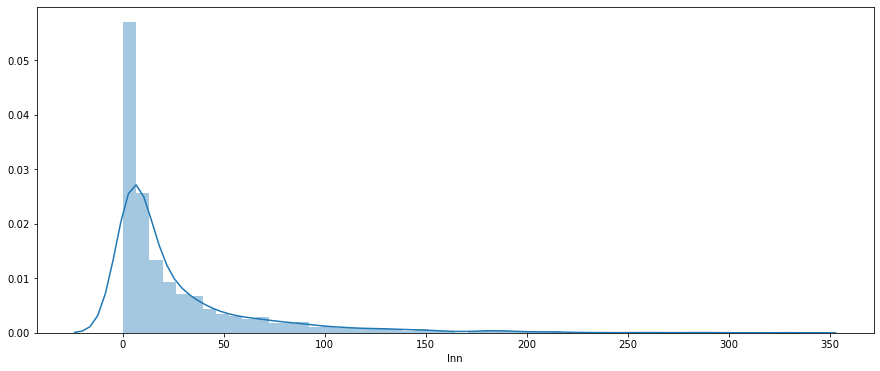

In [46]:
# histogram for the avg. innings played
plt.figure(figsize=(15,6))
sns.distplot(data['Inn'])

In [49]:
data.describe()

,Mat,Inn,NO,Runs,HS,Avg,100,50,0
count,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000,2974.000000
mean,17.078682,27.530599,3.575992,717.316073,68.025891,19.878948,1.338937,3.289509,2.982179
std,24.165212,39.374545,6.078872,1483.064268,66.272194,14.720211,4.026834,7.351026,4.155895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,35.000000,18.000000,8.667500,0.000000,0.000000,0.000000
50%,7.000000,11.000000,1.000000,153.000000,45.000000,17.330000,0.000000,0.000000,1.000000
75%,21.000000,34.000000,4.000000,655.750000,101.000000,28.682500,1.000000,3.000000,4.000000
max,200.000000,329.000000,89.000000,15921.000000,380.000000,160.500000,51.000000,68.000000,43.000000


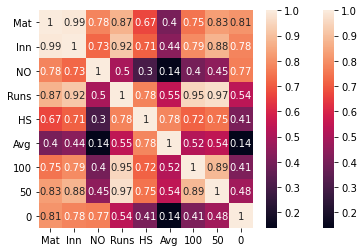

In [50]:
# Relationship Analysis ###

corelation = data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=False)


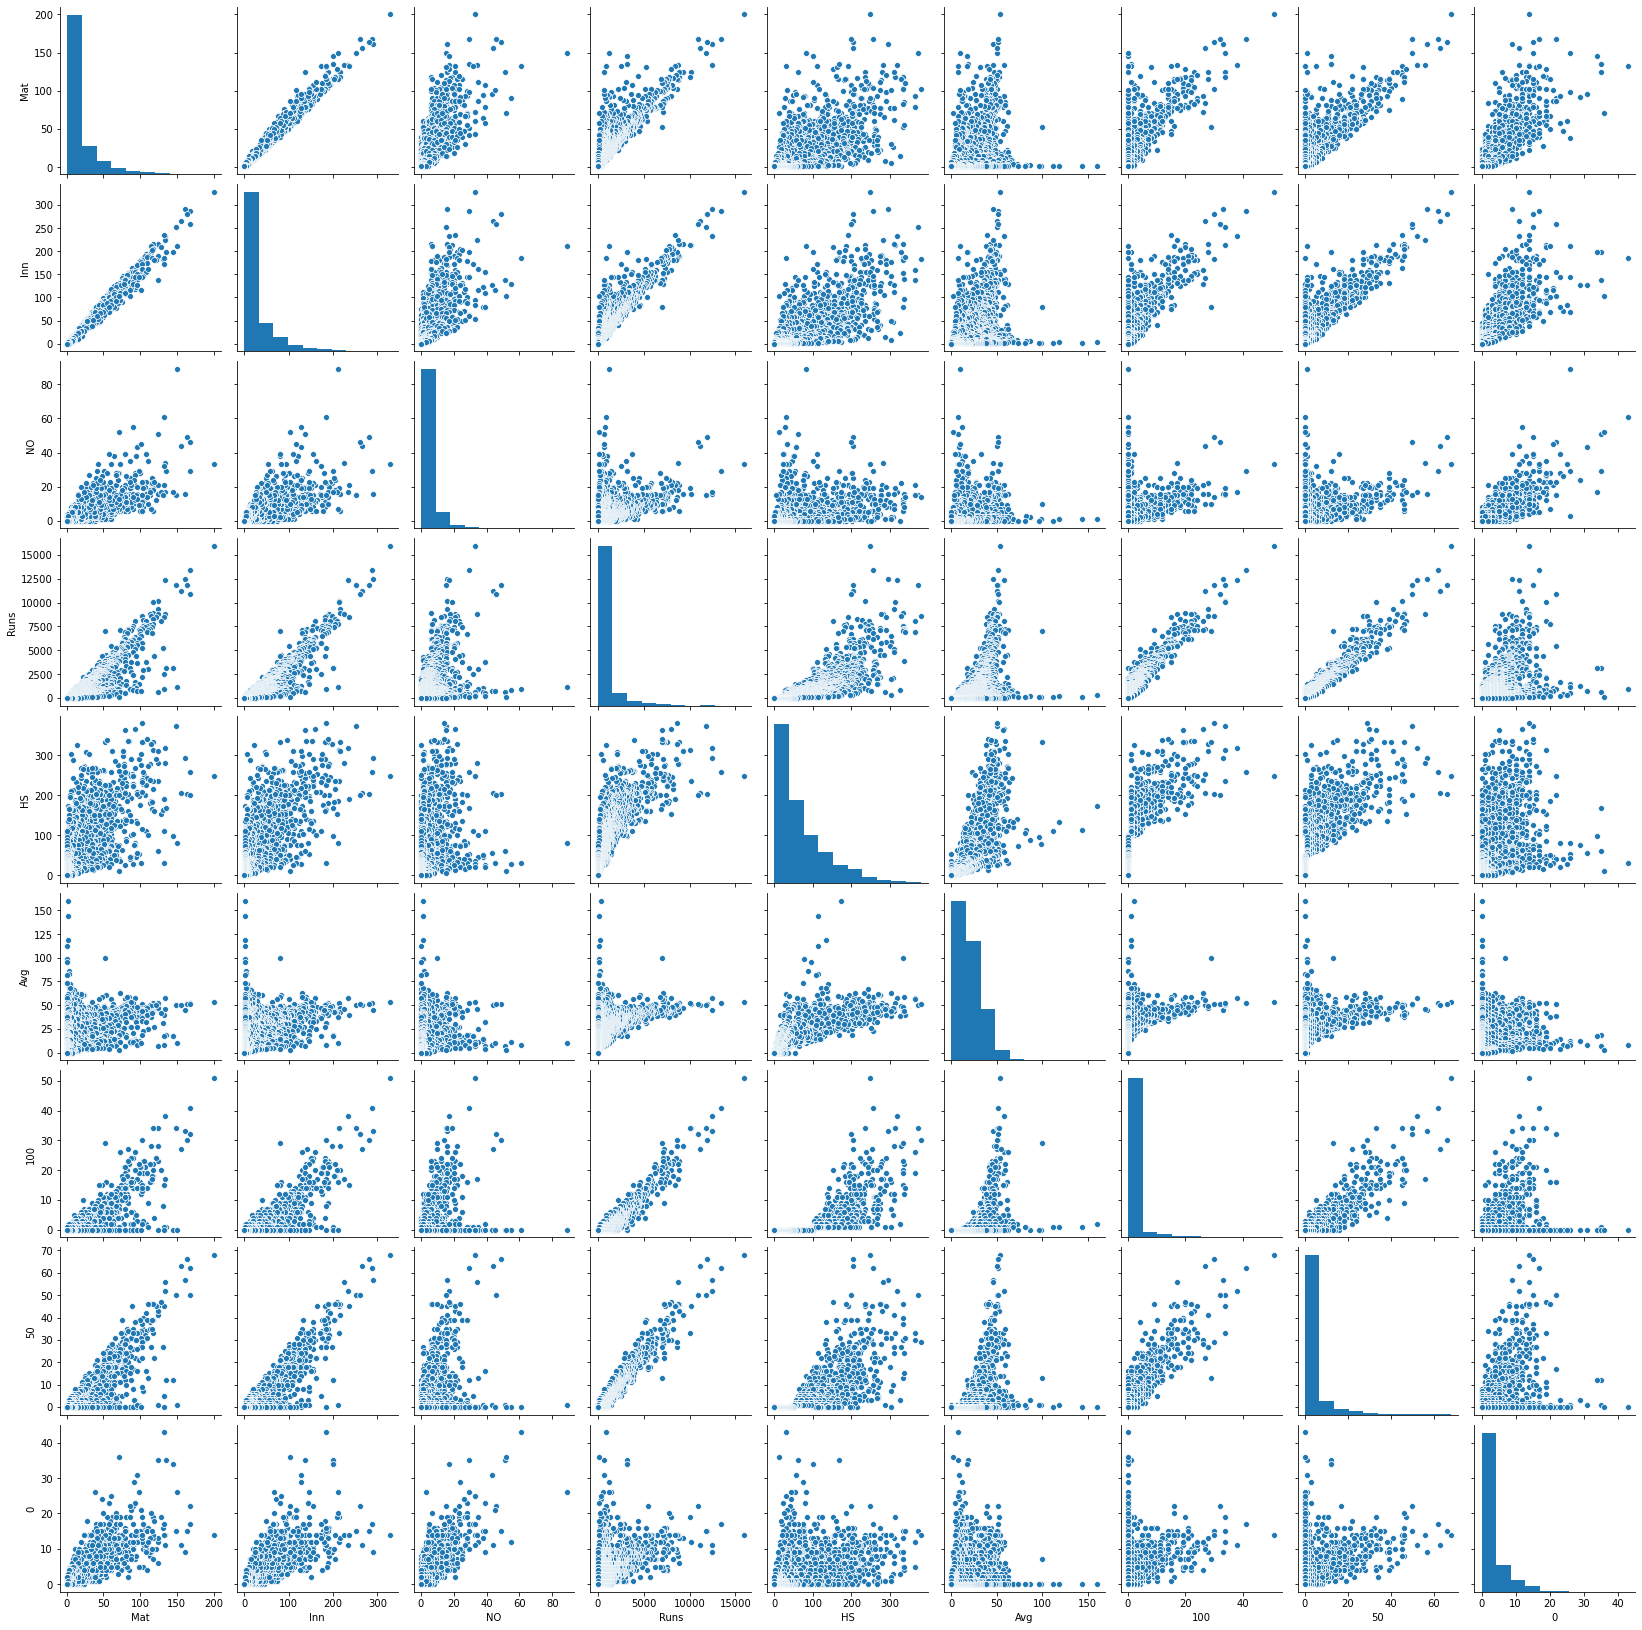

In [51]:
sns.pairplot(data)

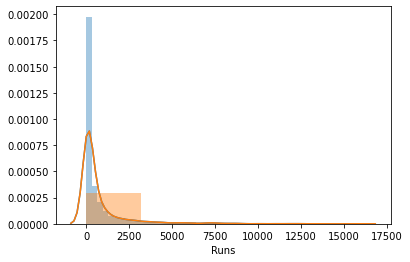

In [52]:
sns.distplot(data['Runs'])
sns.distplot(data['Runs'], bins=5)

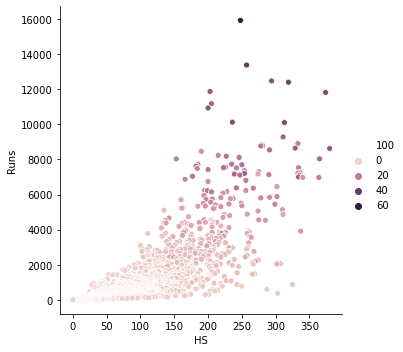

In [53]:
sns.relplot(x = 'HS', y = 'Runs', hue= '100', data= data)

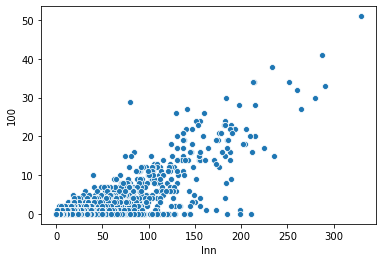

In [47]:
# scatterplot for the no. of centuries scored for the innings played
sns.scatterplot(data['Inn'], data['100'])

c:\python\lib\site-packages\dabl\preprocessing.py:351: UserWarning: Discarding near-constant features: ['Inn_-', 'NO_-', 'Runs_-', 'Avg_-', '100_-', '50_-', '0_-']
  warn("Discarding near-constant features: {}".format(
c:\python\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 1 outliers in column Mat.
  warn("Dropped {} outliers in column {}.".format(
c:\python\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 7 outliers in column 0_dabl_continuous.
  warn("Dropped {} outliers in column {}.".format(
c:\python\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 3 outliers in column Inn_dabl_continuous.
  warn("Dropped {} outliers in column {}.".format(
c:\python\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 5 outliers in column NO_dabl_continuous.
  warn("Dropped {} outliers in column {}.".format(
c:\python\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 7 outliers in column Avg_dabl_continuous.
  warn("Dropped {} ou

Target looks like classification
Linear Discriminant Analysis training set score: 0.096


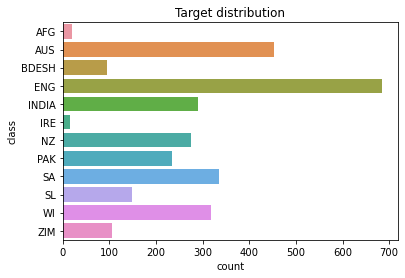

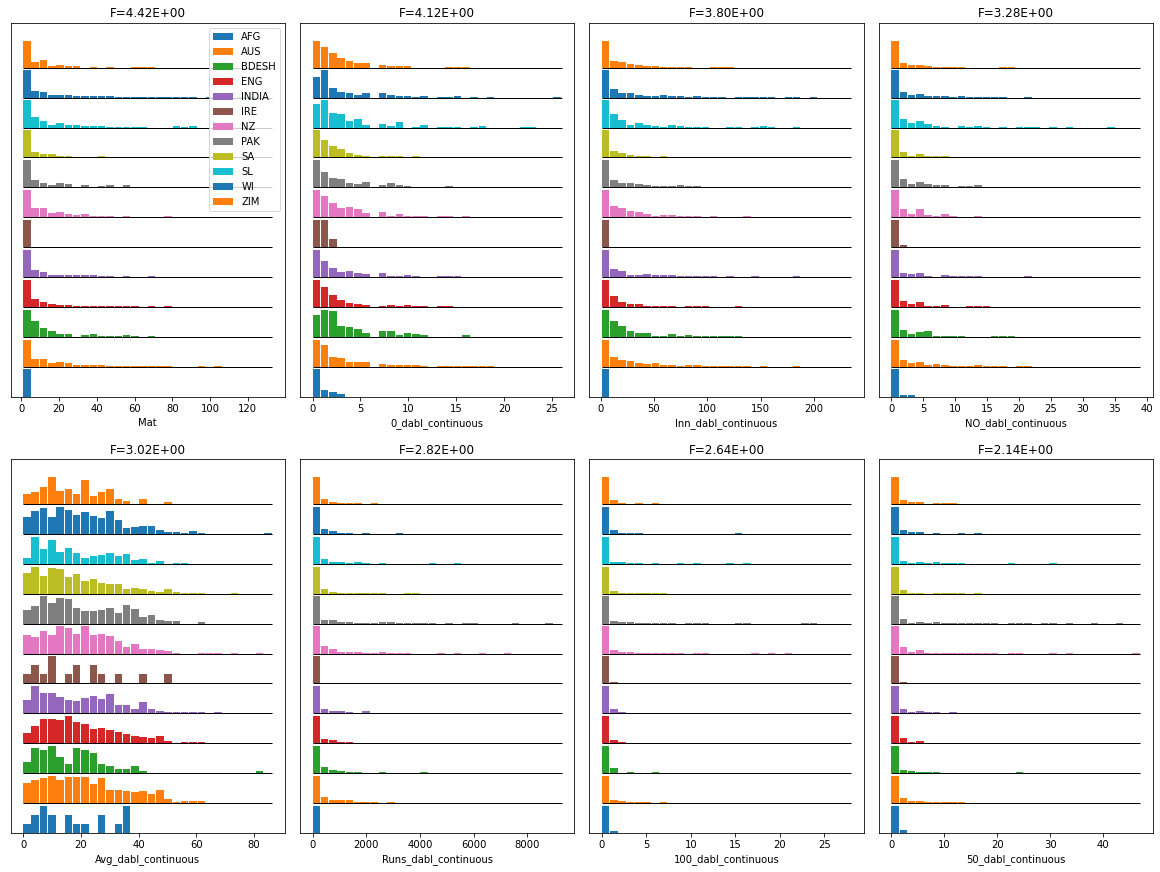

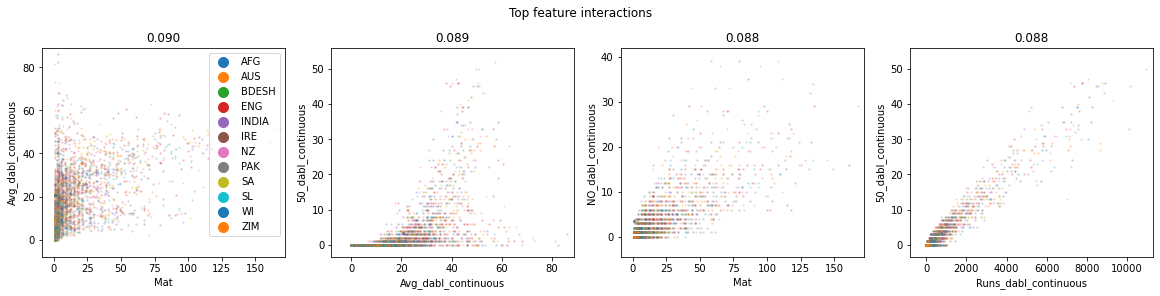

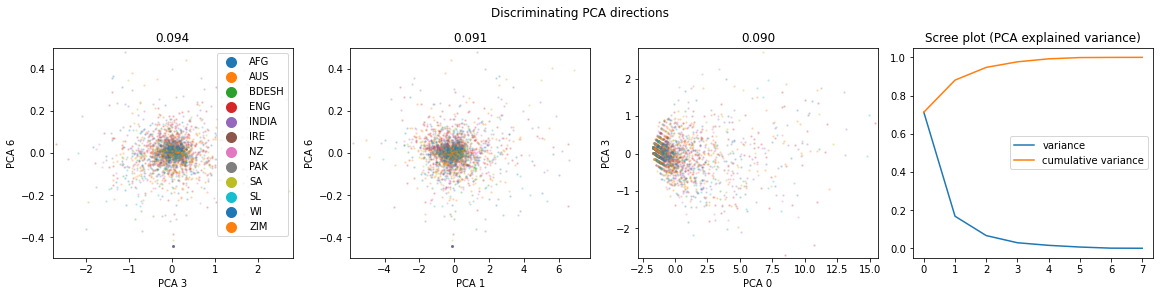

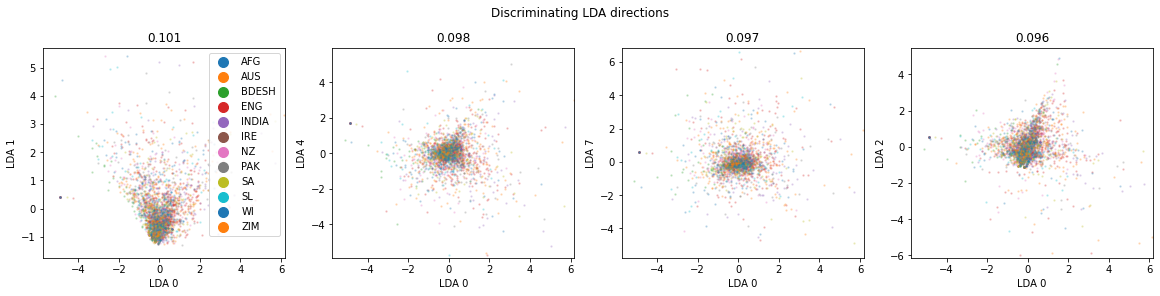

In [19]:
dabl.plot(data, target_col='Country')
